# Brownain Motion 

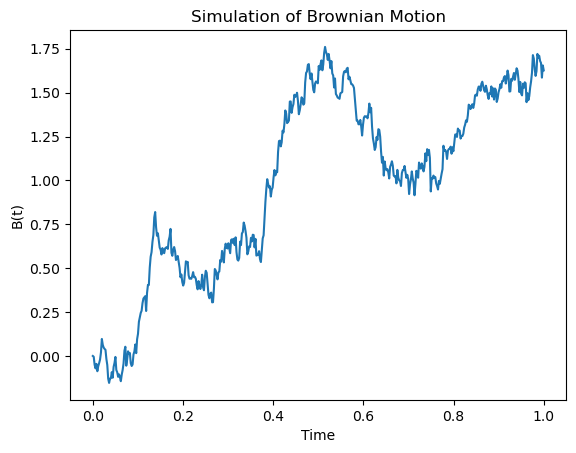

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0  # total time
N = 500  # number of steps
dt = T/N  # time step
t = np.linspace(0, T, N)

# Generate Brownian motion
B = np.zeros(N)
for i in range(1, N):
    B[i] = B[i-1] + np.sqrt(dt) * np.random.randn()

# Plot the Brownian motion
plt.plot(t, B)
plt.title('Simulation of Brownian Motion')
plt.xlabel('Time')
plt.ylabel('B(t)')
plt.show()


# Sample Path

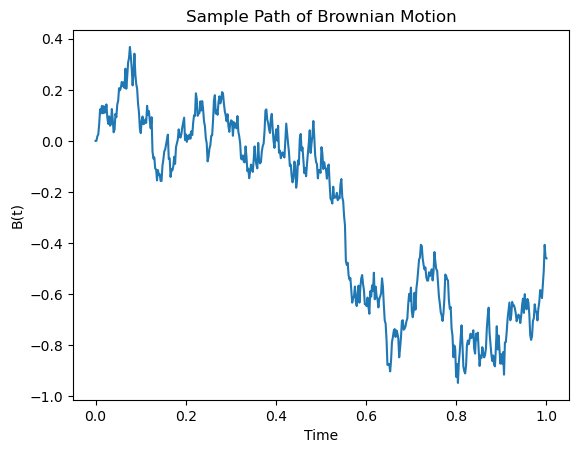

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0  # total time
N = 500  # number of steps
dt = T/N  # time step
t = np.linspace(0, T, N)

# Generate a sample path of Brownian motion
B = np.zeros(N)
for i in range(1, N):
    B[i] = B[i-1] + np.sqrt(dt) * np.random.randn()

# Plot the sample path
plt.plot(t, B)
plt.title('Sample Path of Brownian Motion')
plt.xlabel('Time')
plt.ylabel('B(t)')
plt.show()


# geometric brownian motion

<>:26: DeprecationWarning: invalid escape sequence \m
<>:26: DeprecationWarning: invalid escape sequence \m


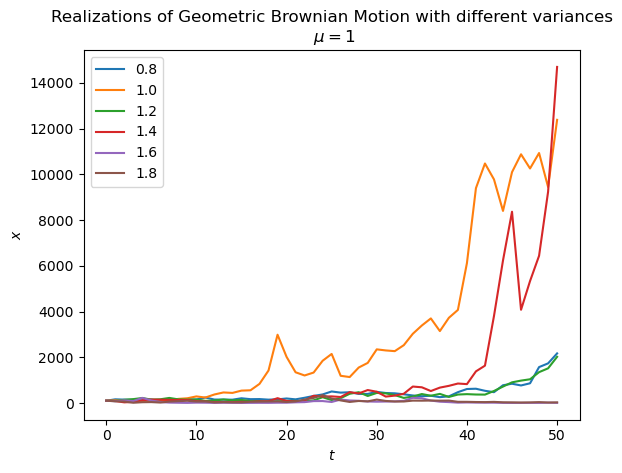

In [1]:
# Python code for the plot

import numpy as np
import matplotlib.pyplot as plt

mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()


# Simulation for a geometric brownian motion

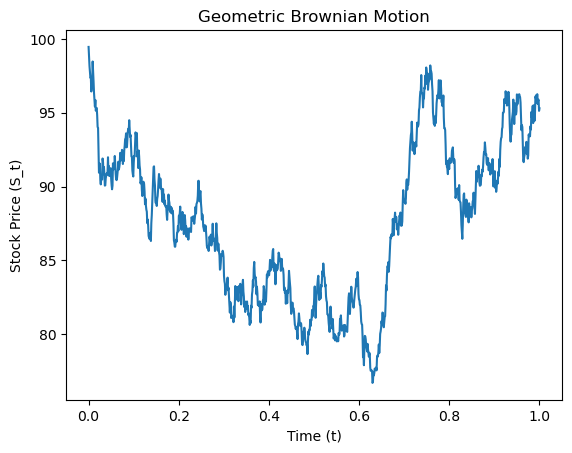

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.05
sigma = 0.2
S0 = 100
T = 1.0  # Time horizon (1 year)
N = 1000  # Number of time steps
dt = T / N  # Time step
t = np.linspace(0, T, N)  # Time grid

# Brownian motion increments
dW = np.sqrt(dt) * np.random.randn(N)
W = np.cumsum(dW)

# Simulate GBM
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Plot the simulated GBM path
plt.plot(t, S)
plt.xlabel('Time (t)')
plt.ylabel('Stock Price (S_t)')
plt.title('Geometric Brownian Motion')
plt.show()


# Simulation of European Option prices

# (a) European Put 

In [8]:
import numpy as np
from scipy.stats import norm

def black_scholes_put(S0, K, r, sigma, T):
    """
    Calculates the price of a European put option using the Black-Scholes formula.
    
    Parameters:
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    r : float
        Risk-free interest rate (annualized).
    sigma : float
        Volatility of the underlying asset (annualized).
    T : float
        Time to expiration (in years).
        
    Returns:
    float
        Price of the European put option.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    
    return put_price

# Example usage:
S0 = 100     # Initial stock price
K = 100      # Strike price
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1        # Time to expiration (in years)

# Calculate the price of the European put option using Black-Scholes formula
option_price = black_scholes_put(S0, K, r, sigma, T)

# Print the result
print(f"Black-Scholes European Put Option Price: {option_price:.4f}")


Black-Scholes European Put Option Price: 5.5735


# (b) European Call

In [5]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S0, K, r, sigma, T):
    """
    Calculates the price of a European call option using the Black-Scholes formula.
    
    Parameters:
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    r : float
        Risk-free interest rate (annualized).
    sigma : float
        Volatility of the underlying asset (annualized).
    T : float
        Time to expiration (in years).
        
    Returns:
    float
        Price of the European call option.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    return call_price

# Example usage:
S0 = 100     # Initial stock price
K = 100      # Strike price
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1        # Time to expiration (in years)

# Calculate the price of the European call option using Black-Scholes formula
option_price = black_scholes_call(S0, K, r, sigma, T)

# Print the result
print(f"Black-Scholes European Call Option Price: {option_price:.4f}")


Black-Scholes European Call Option Price: 10.4506


# Greek Paramaters Simulation $ \Delta, \Gamma, \nu, \Theta, \rho$

In [7]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S0, K, r, sigma, T):
    """
    Calculates the price of a European call option using the Black-Scholes formula.
    
    Parameters:
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    r : float
        Risk-free interest rate (annualized).
    sigma : float
        Volatility of the underlying asset (annualized).
    T : float
        Time to expiration (in years).
        
    Returns:
    tuple
        Tuple containing the price of the European call option, Delta, Gamma, Vega, and Theta.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Option price
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    # Greeks
    Delta = norm.cdf(d1)
    Gamma = norm.pdf(d1) / (S0 * sigma * np.sqrt(T))
    Vega = S0 * norm.pdf(d1) * np.sqrt(T)
    Theta = (-S0 * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2))
    
    return call_price, Delta, Gamma, Vega, Theta

# Example usage:
S0 = 100     # Initial stock price
K = 100      # Strike price
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1        # Time to expiration (in years)

# Calculate the price of the European call option and Greeks using Black-Scholes formula
option_price, Delta, Gamma, Vega, Theta = black_scholes_call(S0, K, r, sigma, T)

# Print the results
print(f"Black-Scholes European Call Option Price: {option_price:.4f}")
print(f"Delta: {Delta:.4f}")
print(f"Gamma: {Gamma:.4f}")
print(f"Vega: {Vega:.4f}")
print(f"Theta: {Theta:.4f}")


Black-Scholes European Call Option Price: 10.4506
Delta: 0.6368
Gamma: 0.0188
Vega: 37.5240
Theta: -6.4140


# Using Monte Carlo

In [2]:
import numpy as np

# Function to simulate European call option using Monte Carlo method
def european_call_option_simulation(S0, K, r, sigma, T, N, M):
    """
    Simulates European call option pricing using Monte Carlo method.
    
    Parameters:
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    r : float
        Risk-free interest rate (annualized).
    sigma : float
        Volatility of the underlying asset (annualized).
    T : float
        Time to expiration (in years).
    N : int
        Number of time steps.
    M : int
        Number of paths (simulations).
        
    Returns:
    float
        Simulated price of the European call option.
    """
    dt = T / N
    S = np.zeros((M, N+1))
    S[:, 0] = S0
    
    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    # Calculate option payoff at expiration
    payoff = np.maximum(S[:, -1] - K, 0)
    
    # Discounted expected payoff
    option_price = np.exp(-r * T) * np.mean(payoff)
    
    return option_price

# Example usage:
S0 = 100      # Initial stock price
K = 105       # Strike price
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
T = 1         # Time to expiration (in years)
N = 252       # Number of time steps (daily simulations for one year)
M = 100000    # Number of paths (simulations)

# Simulate the European call option price
option_price = european_call_option_simulation(S0, K, r, sigma, T, N, M)

print(f"Simulated European Call Option Price: {option_price:.4f}")


Simulated European Call Option Price: 8.0547


In [3]:
import numpy as np

def simulate_greeks(S0, K, r, sigma, T, N, M, epsilon=1e-4):
    dt = T / N
    S = np.zeros((M, N+1))
    S[:, 0] = S0

    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Calculate option payoff at expiration
    payoff = np.maximum(S[:, -1] - K, 0)
    option_price = np.exp(-r * T) * np.mean(payoff)
    
    # Delta: dPrice/dS0
    S_up = S0 * (1 + epsilon)
    S_down = S0 * (1 - epsilon)
    S[:, 0] = S_up
    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff_up = np.maximum(S[:, -1] - K, 0)
    price_up = np.exp(-r * T) * np.mean(payoff_up)

    S[:, 0] = S_down
    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff_down = np.maximum(S[:, -1] - K, 0)
    price_down = np.exp(-r * T) * np.mean(payoff_down)

    delta = (price_up - price_down) / (2 * S0 * epsilon)
    
    # Gamma: d^2Price/dS0^2
    gamma = (price_up - 2 * option_price + price_down) / (S0 * epsilon)**2
    
    # Vega: dPrice/dSigma
    sigma_up = sigma * (1 + epsilon)
    S[:, 0] = S0
    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma_up**2) * dt + sigma_up * np.sqrt(dt) * Z)
    payoff_sigma_up = np.maximum(S[:, -1] - K, 0)
    price_sigma_up = np.exp(-r * T) * np.mean(payoff_sigma_up)
    
    vega = (price_sigma_up - option_price) / (sigma * epsilon)
    
    # Theta: -dPrice/dT
    T_down = T - epsilon
    dt_down = T_down / N
    S[:, 0] = S0
    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt_down + sigma * np.sqrt(dt_down) * Z)
    payoff_T_down = np.maximum(S[:, -1] - K, 0)
    price_T_down = np.exp(-r * T_down) * np.mean(payoff_T_down)
    
    theta = (price_T_down - option_price) / epsilon
    
    # Rho: dPrice/dr
    r_up = r + epsilon
    discount_factor_up = np.exp(-r_up * T)
    S[:, 0] = S0
    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r_up - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff_r_up = np.maximum(S[:, -1] - K, 0)
    price_r_up = discount_factor_up * np.mean(payoff_r_up)
    
    rho = (price_r_up - option_price) / epsilon
    
    return delta, gamma, vega, theta, rho, option_price

# Example usage:
S0 = 100      # Initial stock price
K = 105       # Strike price
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
T = 1         # Time to expiration (in years)
N = 252       # Number of time steps (daily simulations for one year)
M = 100000    # Number of paths (simulations)

# Simulate the Greeks
delta, gamma, vega, theta, rho, option_price = simulate_greeks(S0, K, r, sigma, T, N, M)

print(f"Simulated European Call Option Price: {option_price:.4f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Rho: {rho:.4f}")


Simulated European Call Option Price: 8.0685
Delta: 4.0527
Gamma: -1001.0515
Vega: -3926.3566
Theta: -1380.7007
Rho: -839.1111


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate European call option using Monte Carlo method
def european_call_option_simulation(S0, K, r, sigma, T, N, M):
    """
    Simulates European call option pricing and computes Greeks using Monte Carlo method.
    
    Parameters:
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    r : float
        Risk-free interest rate (annualized).
    sigma : float
        Volatility of the underlying asset (annualized).
    T : float
        Time to expiration (in years).
    N : int
        Number of time steps.
    M : int
        Number of paths (simulations).
        
    Returns:
    tuple
        Tuple containing simulated price of the European call option, delta, gamma, vega, and theta.
    """
    dt = T / N
    S = np.zeros((M, N+1))
    S[:, 0] = S0
    
    for t in range(1, N+1):
        Z = np.random.normal(0, 1, M)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    # Calculate option payoff at expiration (European call option)
    payoff = np.maximum(S[:, -1] - K, 0)
    
    # Discounted expected payoff to present value
    option_price = np.exp(-r * T) * np.mean(payoff)
    
    # Compute Greeks using finite difference method
    epsilon = 0.01
    
    # Delta
    S_up = S0 * (1 + epsilon)
    S_down = S0 * (1 - epsilon)
    
    S_up_sim = np.zeros((M, N+1))
    S_down_sim = np.zeros((M, N+1))
    
    S_up_sim[:, 0] = S_up
    S_down_sim[:, 0] = S_down
    
    for t in range(1, N+1):
        Z_up = np.random.normal(0, 1, M)
        Z_down = np.random.normal(0, 1, M)
        S_up_sim[:, t] = S_up_sim[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_up)
        S_down_sim[:, t] = S_down_sim[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_down)
    
    payoff_up = np.maximum(S_up_sim[:, -1] - K, 0)
    payoff_down = np.maximum(S_down_sim[:, -1] - K, 0)
    
    delta_value = (np.exp(-r * T) * np.mean(payoff_up) - np.exp(-r * T) * np.mean(payoff_down)) / (2 * epsilon * S0)
    
    # Gamma
    gamma_value = (np.exp(-r * T) * np.mean(payoff_up) - 2 * np.exp(-r * T) * np.mean(payoff) + np.exp(-r * T) * np.mean(payoff_down)) / (epsilon**2 * S0**2)
    
    # Vega
    S_volatile = S0 * (1 + epsilon)
    S_stable = S0 * (1 - epsilon)
    
    S_volatile_sim = np.zeros((M, N+1))
    S_stable_sim = np.zeros((M, N+1))
    
    S_volatile_sim[:, 0] = S_volatile
    S_stable_sim[:, 0] = S_stable
    
    for t in range(1, N+1):
        Z_volatile = np.random.normal(0, 1, M)
        Z_stable = np.random.normal(0, 1, M)
        S_volatile_sim[:, t] = S_volatile_sim[:, t-1] * np.exp((r - 0.5 * (sigma + epsilon)**2) * dt + (sigma + epsilon) * np.sqrt(dt) * Z_volatile)
        S_stable_sim[:, t] = S_stable_sim[:, t-1] * np.exp((r - 0.5 * (sigma - epsilon)**2) * dt + (sigma - epsilon) * np.sqrt(dt) * Z_stable)
    
    payoff_volatile = np.maximum(S_volatile_sim[:, -1] - K, 0)
    payoff_stable = np.maximum(S_stable_sim[:, -1] - K, 0)
    
    vega_value = (np.exp(-r * T) * np.mean(payoff_volatile) - np.exp(-r * T) * np.mean(payoff_stable)) / (2 * epsilon)
    
    # Theta
    T_up = T - epsilon
    T_down = T + epsilon
    
    S_T_up = np.zeros((M, N+1))
    S_T_down = np.zeros((M, N+1))
    
    S_T_up[:, 0] = S0
    S_T_down[:, 0] = S0
    
    for t in range(1, N+1):
        Z_T_up = np.random.normal(0, 1, M)
        Z_T_down = np.random.normal(0, 1, M)
        S_T_up[:, t] = S_T_up[:, t-1] * np.exp((r - 0.5 * sigma**2) * (T_up / N) + sigma * np.sqrt(T_up / N) * Z_T_up)
        S_T_down[:, t] = S_T_down[:, t-1] * np.exp((r - 0.5 * sigma**2) * (T_down / N) + sigma * np.sqrt(T_down / N) * Z_T_down)
    
    payoff_T_up = np.maximum(S_T_up[:, -1] - K, 0)
    payoff_T_down = np.maximum(S_T_down[:, -1] - K, 0)
    
    theta_value = (np.exp(-r * T_up) * np.mean(payoff_T_up) - np.exp(-r * T_down) * np.mean(payoff_T_down)) / (2 * epsilon)
    
    return option_price, delta_value, gamma_value, vega_value, theta_value

# Example usage:
S0 = 100     # Initial stock price
K = 100      # Strike price
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1        # Time to expiration (in years)
N = 252      # Number of time steps (daily simulations for one year)
M = 10000    # Number of paths

# Simulate the European call option price and Greeks
option_price, delta, gamma, vega, theta = european_call_option_simulation(S0, K, r, sigma, T, N, M)

# Print the results
print(f"Simulated European Call Option Price: {option_price:.4f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")


Simulated European Call Option Price: 10.4122
Delta: 0.5911
Gamma: 0.0503
Vega: 90.1374
Theta: -9.5006
